# Leaky Integrate-and-Fire model

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from random import randint
from random import random

##  LIF:
    We have a constant flow for a period of time, and during that time we use the following formula to implement the model:

    τ .(du/dt) = -(U(t) - U_rest) + R.I_const(t)
    if u(t) => Threshold  then  Fire + Reset ( u = u reset )

In [2]:
def LIF(I_init=0.005, gl=0.16, Cm=0.0049,num = 1):

    ######### Constants
    U_rest      =   -0.065                  # restint membrane potential [U]
    U_reset     =   -0.065
    thresh  =   -0.050                      # spiking threshold [U]
    tau =  Cm/gl

    ######### Setup
    # TIME
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    U       =   np.empty(len(time))         # array for saving Voltage history
    U[0]    =   U_rest                      # set initial to resting potential
    # CURRENT
    I = I_values(I_init=I_init, time=time,num = num)
    ######### Measurements
    spikes  =   0                           # counter for number of spikes
    t = time[1000]
    ts = 0
    ######### Simulation
    for i in range(1, len(time)):
        # use " tau.(du/dt) = -(U(t) -U_rest) + R.I(t))" to get this equation
        U[i] = (((U_rest - U[i-1]) + I[i]/gl)*dt)/tau + U[i-1]
        
        # in case we exceed threshold
        if U[i] > thresh:
            U[i-1] = 0.04   # set the last step to spike value
            U[i] = U_reset  # current step is resting membrane potential
            ts = time[i]-t
            t = time[i]
            spikes += 1     # count spike
            
    
    return U , ts ,I

def I_values(I_init=0.005, time=None,num = 1):
    I0 = np.zeros(len(time))
    I0[1000:4000] = I_init
    I1 = []
    I2 = []
    I3 = []
    #Setting the initial current_ I1 
    for i in range(0, len(time)):
        
        var = ((math.sin(i/1000)+1)*I_init)*(gauss(0,0.03)+0.11)*10/2
        I1.append(var)
    
    #Setting the initial current_ I1 
    for i in range(0, len(time)):
        
        var = gauss(I_init,I_init*0.1)
        I2.append(var)

    #Setting the initial current_ I2
    for i in range(0, len(time)):
        
        var = ((math.cos(i/100)+1)/4)*((math.sin(i/300)+1)/4)*(gauss(0,0.4*I_init))+I_init
        I3.append(var)
    
    I = [I0,I1,I2,I3]
        
    return I[num-1]

## (F - I ) curve plot
    we can have different (F-I) curve plot by changing the amount of τ  (using of C , R=1/gl  =>  τ =R.C)
    we compute frequency of our model based on different amount of current => I :[0,0.1]V

In [3]:
def FI_curve(g,C):
    F = []
    #compute Frequency based on different amount of constant current I
    I_inp= np.arange(0,0.1001,0.0001)
    for i in I_inp:
        U,ts,I = LIF(I_init=i , gl=g, Cm=C) 
        F.append(1/(0.005+ts)) if ts>0 else F.append(ts)



    fig1 = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(10, 7))
    plt.subplot(111)
    plt.title("Interactive Leaky Integrate-and-Fire Neuron Model")
    fig1.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.plot(I_inp,F,'r--',label="F-I curve")
    plt.legend(loc="lower right")

    # add axis labels
    plt.ylabel("f (1/T)")
    plt.xlabel("I (V)")

##  Interactive Leaky Integrate-and-Fire Neuron Simulation
    we implement (U - t) and (I - t) diagram in one frame ,we assume U_rest= - 65mv and threshold = -50 mv

In [4]:
def LIF_Model(I_init,gl_init,Cm_init):
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # update functions for lines
    U , ts , I= LIF(I_init=I_init, gl=gl_init, Cm=Cm_init)
    thresh = np.zeros(len(time))
    thresh[0:5001] = -0.05

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 8))
    plt.subplot(111)
    plt.title("Leaky Integrate-and-Fire Neuron Model")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.plot(time,thresh,'r--' ,label="thresh")[0]
    plt.plot(time, U, label="Potential:U")[0]
    plt.plot(time, I, label="Applied Current:I")[0]
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]")
    plt.xlabel("Time [s]")
    

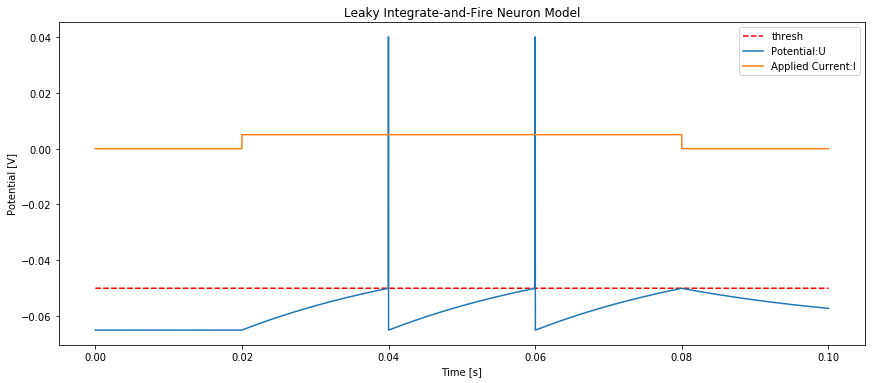

In [5]:
LIF_Model(0.005,0.16,0.0049)

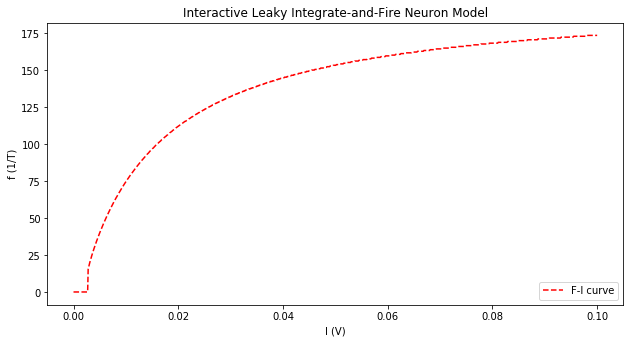

In [6]:
FI_curve(0.16,0.0049)

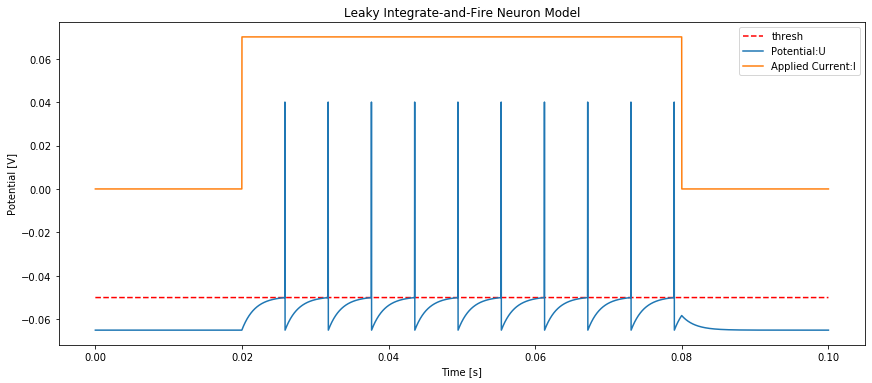

In [7]:
LIF_Model(0.07,4.5,0.008) 

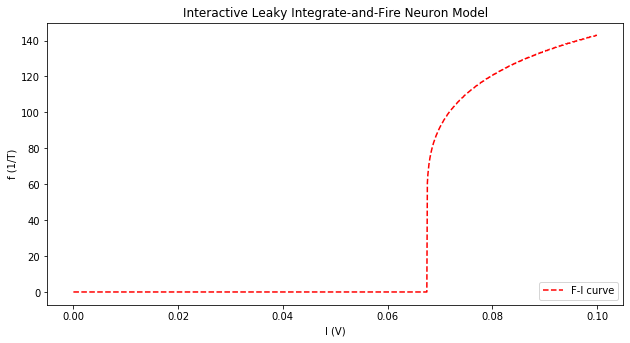

In [8]:
FI_curve(4.5,0.008)

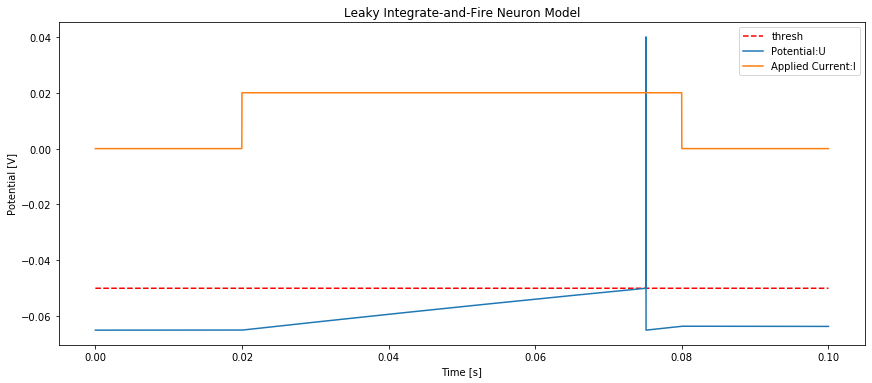

In [9]:
LIF_Model(0.02,0.16,0.069) 

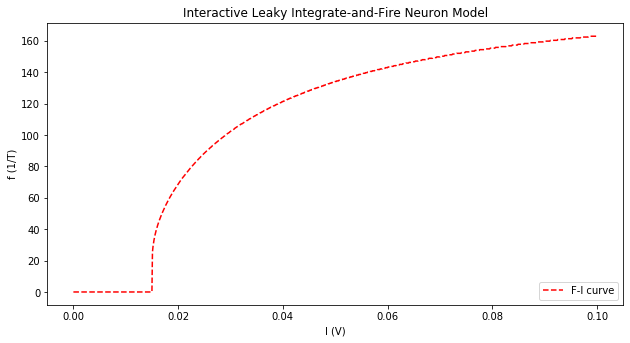

In [10]:
FI_curve(1,0.0069)

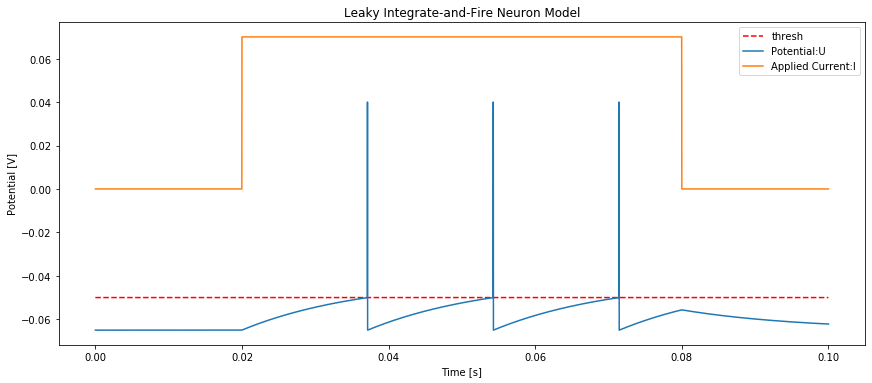

In [11]:
LIF_Model(0.07,3,0.05) 

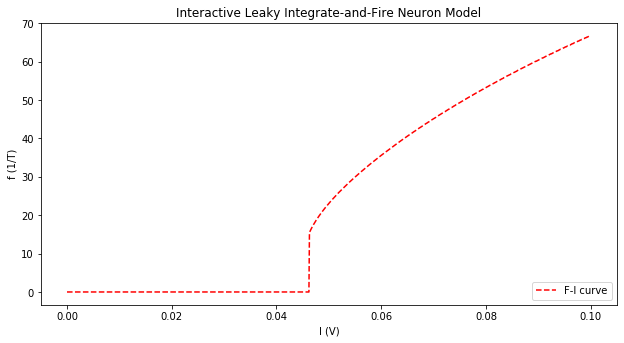

In [12]:
FI_curve(3,0.05)

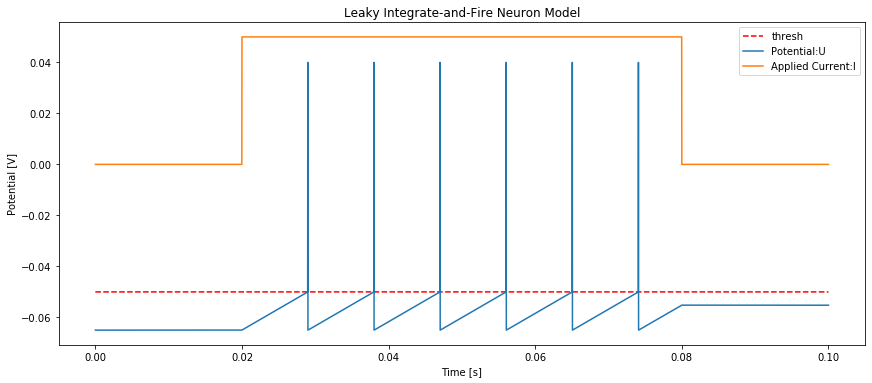

In [13]:
LIF_Model(0.05,0.003,0.03)

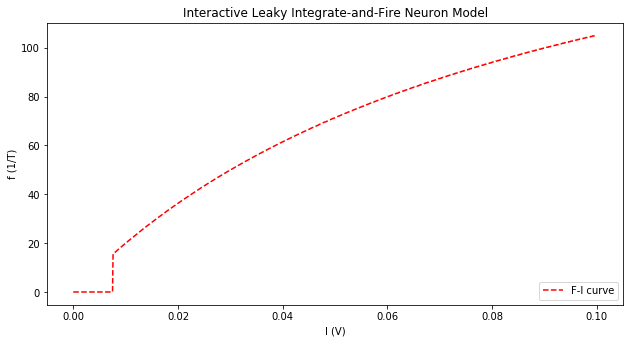

In [14]:
FI_curve(0.003,0.03)

### LIF Neuron Simulation for Variable current based on time

In [15]:
def LIF_Model2(I_init,gl_init,Cm_init,num_init):
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # update functions for lines
    U,ts,I= LIF(I_init=I_init, gl=gl_init, Cm=Cm_init, num=num_init)
    thresh = np.zeros(len(time))
    thresh[0:5001] = -0.05

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 14))
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    plt.subplot(211)
    plt.title("Leaky Integrate-and-Fire Neuron Model")
    plt.plot(time,thresh,'r--' ,label="thresh")[0]
    plt.plot(time, I, label="Applied Current:I")[0]
    plt.plot(time, U, label="Potential:U")[0]
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]")
    plt.subplot(212)
    plt.plot(time, I, label="Applied Current:I")
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("I(t) [V]")
    plt.xlabel("Time [s]")

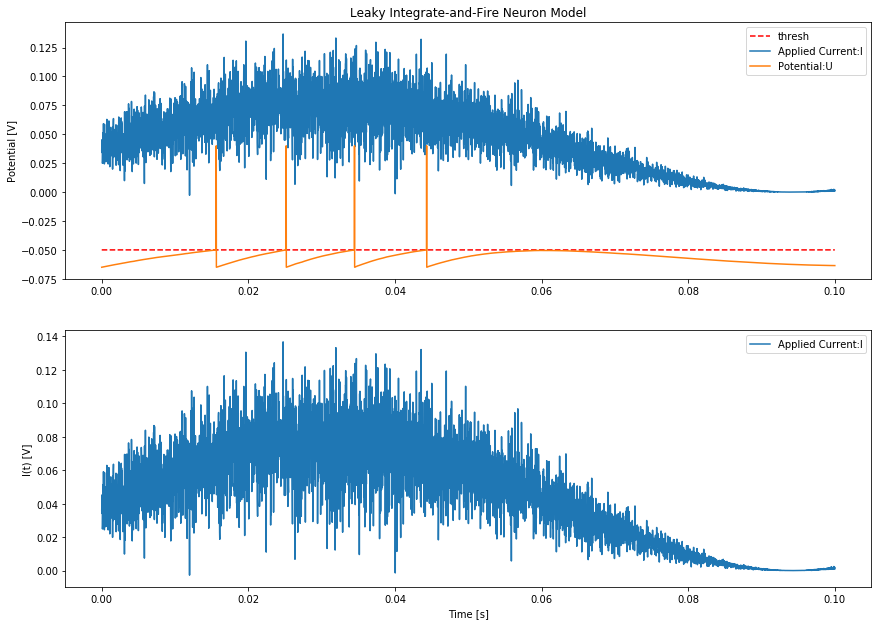

In [16]:
LIF_Model2(0.07,3,0.03,2)

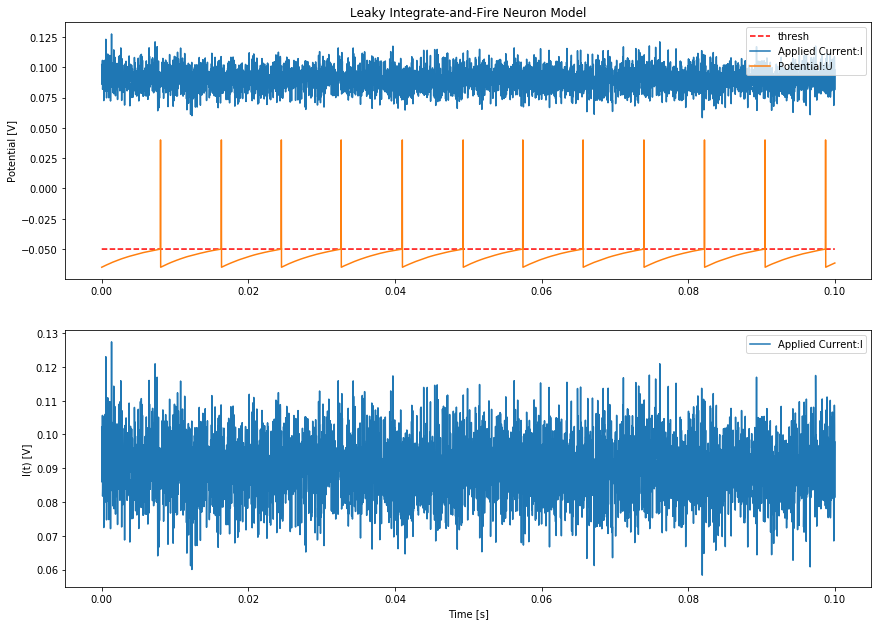

In [17]:
LIF_Model2(0.09,4,0.03,3)

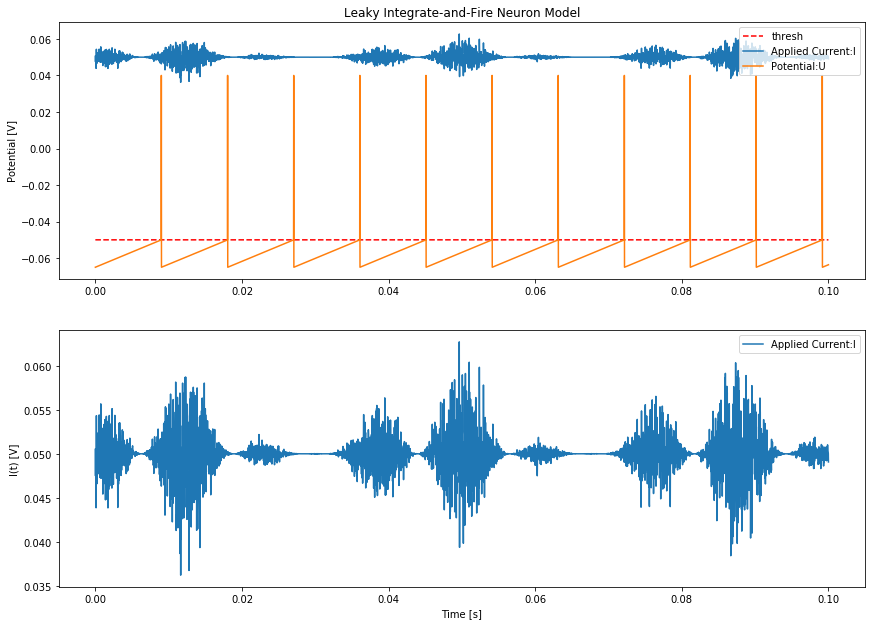

In [18]:
LIF_Model2(0.05,0.003,0.03,4)

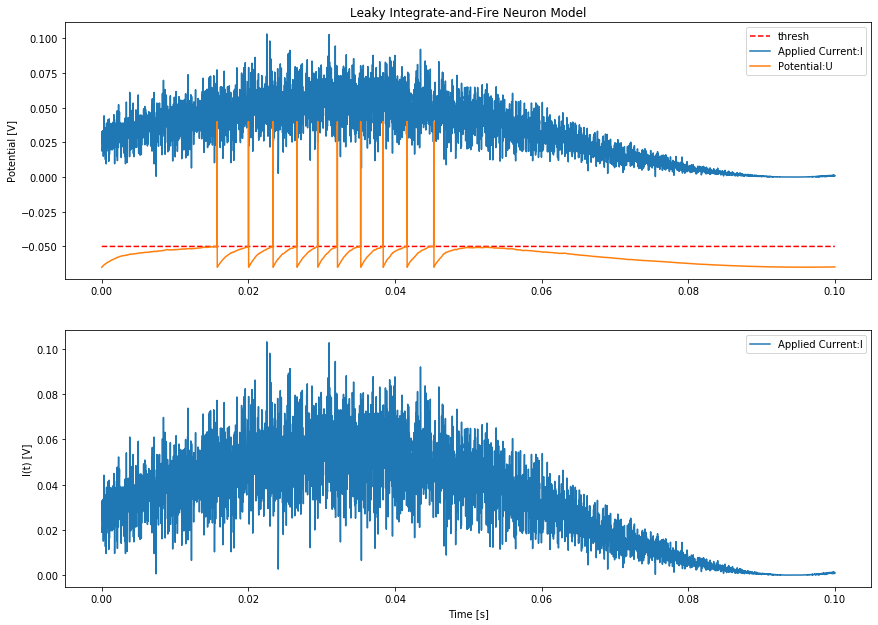

In [19]:
LIF_Model2(0.05,3,0.005,2)

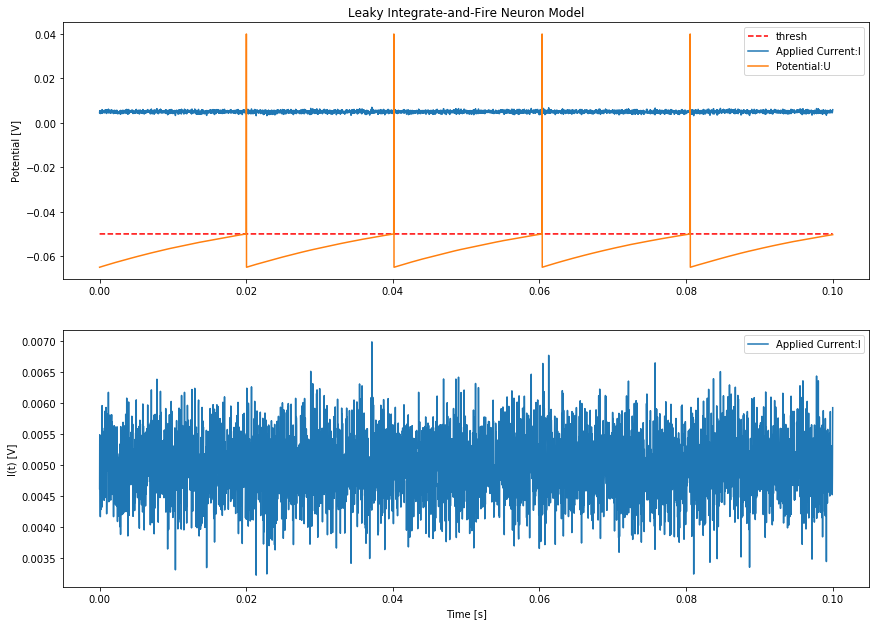

In [20]:
LIF_Model2(0.005,0.16,0.0049,3)

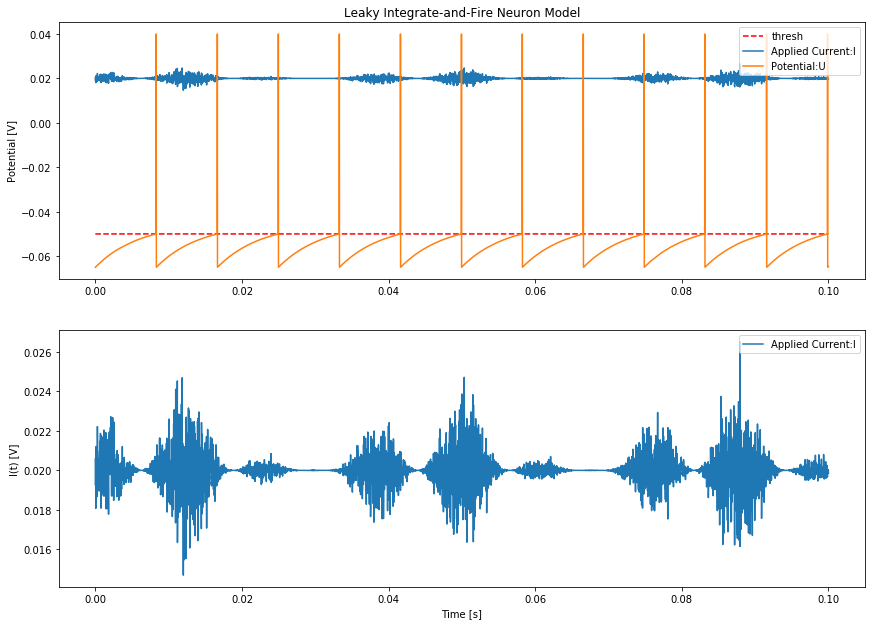

In [21]:
LIF_Model2(0.02,1,0.006,4)